In [1]:
import pickle
import numpy as np
from numpy import linalg as LA
from cossim import build_cossim
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
import re
import json

In [2]:
lyrics = pickle.load(open("broadway_lyrics_v5.pkl", "rb"))

In [3]:
lyrics.keys()

dict_keys(['Bad Girls', 'Follies', 'Spider-Man, Turn Off the Dark', 'Grey Gardens', 'Little Women', 'Gypsy', 'Fame', "You're a Good Man, Charlie Brown", 'Zombie Prom', 'Menopause', 'Little Mermaid', '42nd Street', 'Cinderella: Songs from the Classic Fairy Tale', 'Boy Friend, The', 'Beautiful Game, The', 'Babes In Arms', 'Cabaret', 'Andrew Lloyd Webber Divas', 'Brigadoon', 'High School Musical 2', 'Happiest Girl in the World, The', 'Civil War, The', 'Kinky Boots', 'Can-Can', 'Spamalot', 'Boys From Syracuse, The', 'Sunday in the Park With George', 'Damn Yankees', "Movin' Out", 'Chess in Concert [LIVE]', 'White Christmas', 'Pretty Woman', "They're Playing Our Song", '110 in the Shade', 'Spoof Odyssey', 'Big', "It's Only Life", 'Notre Dame de Paris', 'Forbidden Broadway Goes to Rehab', 'Charlie and the Chocolate Factory', 'Flora The Red Menace', 'Triumph Of Love', 'Little Night Music', 'Disney: 60 Years of Musical Magic', 'Priscilla: Queen of the Desert', 'Bounce', 'Drowsy Chaperone, The',

In [4]:
lyrics["High School Musical"]

{'composer': 'Greg Cham, Ray Cham, Andy Dodd, Faye Greenberg, Jamie Houston, Adam Watts, Matthew Gerrard, Drew Lane, Eddie Galan, Drew Seeley',
 'currently_playing': False,
 'description': 'The first part of the magnificent musical trilogy opens an image of the main characters of the musical. By means of the songs, a viewer percepts Troy and Gabriella\'s feelings. It is that strange occurrence, when disadvantages become supremacies. All the excessive emotionality turns into benefit, when you get used to it. The plot is simple and has no special value. It’s a love story about school life of "ordinary" students with their problems and troubles. Observing it is quite dullish, especially, when all the twists of the plot are terribly predictable. The movie has a lack of intrigue, unless there are small turns of the plot closer to the final. The moral is quite simple: it is necessary just to work and enjoy your life. Before meeting Gabriella, the most cherished dream of Troy was a victory in

In [5]:
# get TF-IDF of lyrics

d = {}
for show in lyrics:
    S = ""
    for line in lyrics[show]["lyrics"]:
        S += " " + line
    d[show] = S
    
tfidf_vec = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 3, norm = "l2")
doc_by_vocab = tfidf_vec.fit_transform([d[i] for i in d]).toarray()
index_to_vocab = {i:v for i, v in enumerate(tfidf_vec.get_feature_names())}

In [6]:
musical_name_to_index = {musical:index for index, musical in enumerate(lyrics.keys())}

In [7]:
doc_by_vocab[214]

array([0.        , 0.00750615, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [8]:
musical_name_to_index["Mamma Mia!"]

56

In [9]:
normboy = np.apply_along_axis(LA.norm,1,doc_by_vocab)

In [10]:
musical_index_to_name = {value:key for key,value in musical_name_to_index.items()}

In [11]:
cosmat = build_cossim(doc_by_vocab)

C:\Users\AChatt10\OneDrive\Arjun\School\2018-19 (Sem2)\CS 4300\cs4300sp2019-jp2254-nmd65-bdg74-ac2582-srm276\cossim.py:17: RuntimeWarning: invalid value encountered in true_divide
  intermediate = np.divide(dot,norms)
C:\Users\AChatt10\OneDrive\Arjun\School\2018-19 (Sem2)\CS 4300\cs4300sp2019-jp2254-nmd65-bdg74-ac2582-srm276\cossim.py:18: RuntimeWarning: invalid value encountered in true_divide
  sim_mat = np.divide(np.transpose(intermediate),norms)


In [12]:
np.sum(np.isnan(cosmat),axis=1)

array([ 40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40, 472,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40, 472,  40,  40, 472,  40,  40, 472,  40,  40,  40,
        40, 472,  40,  40,  40,  40, 472,  40, 472,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40, 472,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40, 472,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40, 472,  40,  40,  40,  40,  40,
        40,  40, 472,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
        40,  40,  40,  40,  40,  40,  40,  40,  40, 472,  40, 47

In [13]:
musical_index_to_name

{0: 'Bad Girls',
 1: 'Follies',
 2: 'Spider-Man, Turn Off the Dark',
 3: 'Grey Gardens',
 4: 'Little Women',
 5: 'Gypsy',
 6: 'Fame',
 7: "You're a Good Man, Charlie Brown",
 8: 'Zombie Prom',
 9: 'Menopause',
 10: 'Little Mermaid',
 11: '42nd Street',
 12: 'Cinderella: Songs from the Classic Fairy Tale',
 13: 'Boy Friend, The',
 14: 'Beautiful Game, The',
 15: 'Babes In Arms',
 16: 'Cabaret',
 17: 'Andrew Lloyd Webber Divas',
 18: 'Brigadoon',
 19: 'High School Musical 2',
 20: 'Happiest Girl in the World, The',
 21: 'Civil War, The',
 22: 'Kinky Boots',
 23: 'Can-Can',
 24: 'Spamalot',
 25: 'Boys From Syracuse, The',
 26: 'Sunday in the Park With George',
 27: 'Damn Yankees',
 28: "Movin' Out",
 29: 'Chess in Concert [LIVE]',
 30: 'White Christmas',
 31: 'Pretty Woman',
 32: "They're Playing Our Song",
 33: '110 in the Shade',
 34: 'Spoof Odyssey',
 35: 'Big',
 36: "It's Only Life",
 37: 'Notre Dame de Paris',
 38: 'Forbidden Broadway Goes to Rehab',
 39: 'Charlie and the Chocolate F

In [14]:
cosmat

array([[1.        , 0.04939229, 0.04826241, ..., 0.05757746, 0.06826108,
        0.09389016],
       [0.04939229, 1.        , 0.05769741, ..., 0.04754189, 0.06701639,
        0.08618397],
       [0.04826241, 0.05769741, 1.        , ..., 0.05800876, 0.05456826,
        0.09467673],
       ...,
       [0.05757746, 0.04754189, 0.05800876, ..., 1.        , 0.08667407,
        0.1159552 ],
       [0.06826108, 0.06701639, 0.05456826, ..., 0.08667407, 1.        ,
        0.14256142],
       [0.09389016, 0.08618397, 0.09467673, ..., 0.1159552 , 0.14256142,
        1.        ]])

In [15]:
def get_sim(mus_1, mus_2, sim_mat = cosmat, name_to_index = musical_name_to_index):
    ind_1 = name_to_index[mus_1]
    ind_2 = name_to_index[mus_2]
    score = sim_mat[ind_1,ind_2]
    return score

In [16]:
def rank_mus(musical,matrix):
    mus_idx = musical_name_to_index[musical]
    score_list = matrix[mus_idx]
    sorted_i = np.argsort(score_list)[::-1]
    mus_score_list = [(musical_index_to_name[i],score) for i,score in enumerate(score_list)]
#     mus_score_list_sorted = sorted(mus_score_list,key=lambda i: -i[1])
#     print(score_list)
    return np.array(mus_score_list)[sorted_i]

In [17]:
rank_mus("Mamma Mia!",cosmat)

array([['Closer Than Ever', 'nan'],
       ['Oh Captain', 'nan'],
       ['Oklahoma', 'nan'],
       ['Songs For A New World', 'nan'],
       ['Annie', 'nan'],
       ['Camelot', 'nan'],
       ['Pirates of Penzance, The', 'nan'],
       ['Hamilton', 'nan'],
       ['Radio City Christmas Spectacular', 'nan'],
       ['Silence!', 'nan'],
       ['How to Succeed in Business Without Really Trying', 'nan'],
       ['Anna Karenina', 'nan'],
       ['Do Re Mi', 'nan'],
       ['She Loves Me', 'nan'],
       ['Bye Bye Birdie', 'nan'],
       ['Apple Tree, The', 'nan'],
       ['Two Gentlemen of Verona', 'nan'],
       ['Woman In White', 'nan'],
       ['My Favorite Year', 'nan'],
       ['Music Man, The', 'nan'],
       ['Mack & Mabel', 'nan'],
       ['Ernest in Love', 'nan'],
       ['Addams Family, The', 'nan'],
       ['Bombay Dreams', 'nan'],
       ['Call Me Madam', 'nan'],
       ['By Jeeves', 'nan'],
       ['Applause', 'nan'],
       ['Pippin', 'nan'],
       ['I Love My Wife', 'nan'

In [18]:
# composer stuff
for i in lyrics:
    print(lyrics[i]["composer"])

Kath Gotts
Stephen Sondheim
Bono and The Edge
Scott Frankel.
Jason Howland
Jule Styne
Steve Margoshes
Andrew Lippa
Dana P. Rowe

Alan Menken
Harry Warren

Sandy Wilson.

Richard Rodgers.
John Kander



Jacques Offenbach
Frank Wildhorn
Cyndi Lauper
Cole Porter
John Du Prez, Eric Idle and Neil Innes
Richard Rodgers.
Stephen Sondheim
Richard Adler
Billy Joel
Benny Andersson and Björn Ulvaeus
Irving Berlin
Bryan Adams and Jim Vallance
Marvin Hamlisch
Harvey Schmidt

David Shire.

Richard Cocciante

Marc Shaiman and Scott Wittman
John Kander
Jeffrey Stock
Stephen Sondheim

Various
Stephen Sondheim.
Lisa Lambert & Greg Morrison.

Alan Menken
Andrew Lloyd Webber
Randy Newman

Ellie Greenwich
Mary Rodgers
: Barry Manilow
Jerry Bock
Benny Andersson and Bjorn Ulvaeus.
Stephen Schwartz.
Irving Berlin

George Stiles
Richard Rodgers

Emilio Estefan, Gloria Estefan, Miami Sound Machine
Irving Berlin
Cy Coleman
Charles Strouse.
Andrew Lloyd Webber
Jerry Herman
Stephen Flaherty
Roger Miller.
Gary Adle

In [19]:
compM = np.zeros([len(lyrics),len(lyrics)])
for mus1 in musical_name_to_index:
    i = musical_name_to_index[mus1]
    comp1 = lyrics[mus1]["composer"]
    if len(comp1) > 0:
        comp1_nop = re.sub(r'[^\w ,]','',comp1)
        for mus2 in musical_name_to_index:
            j = musical_name_to_index[mus2]
            comp2 = lyrics[mus2]["composer"]
            if len(comp2) > 0:
                comp2_nop = re.sub(r'[^\w ,]','',comp2)
                compM[i,j] = (comp1_nop in comp2_nop) or (comp2_nop in comp1_nop)

In [20]:
for i in range(len(compM)):
    print(sum(compM[i,:]))

1.0
14.0
1.0
2.0
1.0
10.0
1.0
3.0
1.0
0.0
9.0
1.0
0.0
1.0
0.0
12.0
9.0
0.0
0.0
0.0
1.0
6.0
1.0
6.0
1.0
12.0
14.0
2.0
1.0
1.0
7.0
1.0
3.0
3.0
0.0
4.0
0.0
1.0
0.0
4.0
9.0
1.0
14.0
0.0
7.0
14.0
1.0
0.0
9.0
15.0
1.0
0.0
1.0
2.0
1.0
4.0
1.0
5.0
7.0
0.0
2.0
12.0
0.0
1.0
7.0
8.0
5.0
15.0
7.0
8.0
1.0
1.0
8.0
1.0
9.0
2.0
1.0
3.0
14.0
1.0
1.0
0.0
15.0
10.0
1.0
1.0
1.0
7.0
10.0
9.0
3.0
0.0
10.0
2.0
7.0
1.0
0.0
12.0
1.0
2.0
4.0
0.0
1.0
9.0
8.0
1.0
0.0
0.0
0.0
1.0
1.0
7.0
1.0
0.0
4.0
0.0
4.0
5.0
1.0
2.0
0.0
0.0
1.0
8.0
1.0
1.0
0.0
4.0
2.0
4.0
1.0
1.0
2.0
6.0
4.0
0.0
0.0
1.0
1.0
2.0
1.0
1.0
3.0
2.0
0.0
2.0
0.0
0.0
0.0
1.0
15.0
0.0
3.0
10.0
1.0
1.0
1.0
9.0
1.0
1.0
1.0
0.0
8.0
1.0
0.0
2.0
1.0
4.0
9.0
15.0
9.0
7.0
0.0
1.0
1.0
1.0
1.0
6.0
5.0
1.0
0.0
1.0
1.0
1.0
4.0
1.0
15.0
4.0
2.0
12.0
1.0
1.0
1.0
0.0
0.0
1.0
2.0
0.0
0.0
12.0
0.0
4.0
14.0
10.0
1.0
0.0
3.0
2.0
1.0
4.0
3.0
15.0
8.0
6.0
1.0
4.0
9.0
0.0
2.0
1.0
1.0
3.0
0.0
10.0
1.0
0.0
2.0
3.0
1.0
1.0
1.0
2.0
1.0
2.0
12.0
3.0
7.0
12.0
0.0
15.0
1.0
1.0
1.0

In [21]:
musical_name_to_index

{'110 in the Shade': 33,
 '13': 410,
 '1776': 181,
 '25th Annual Putnam County Spelling Bee': 390,
 '42nd Street': 11,
 '70, Girls, 70': 303,
 '9 to 5': 160,
 'A Day in Hollywood / A Night in the Ukraine': 236,
 'Ace': 464,
 'Across the Universe': 166,
 'Act, The': 434,
 'Addams Family, The': 373,
 'Adding Machine': 136,
 'Adrift In Macao': 204,
 'Adventures of Tom Sawyer, The': 156,
 'Aida': 395,
 "Ain't Misbehavin'": 198,
 "Ain't Too Proud": 468,
 'Aladdin': 216,
 "Alas! Alack! Zorro's Back!": 299,
 'All Shook Up': 440,
 'Allegro': 234,
 'Altar Boyz': 86,
 'American Idiot': 80,
 'American Mall': 161,
 'American in Paris, An': 127,
 'Anastasia': 389,
 'Andrew Lloyd Webber Divas': 17,
 'Anna Karenina': 73,
 'Annie': 66,
 'Annie Get Your Gun': 443,
 'Anyone Can Whistle': 283,
 'Anything Goes': 314,
 'Applause': 324,
 'Apple Tree, The': 100,
 'Ark, The': 259,
 'As Thousands Cheer': 448,
 'Aspects of Love': 271,
 'Assassins': 78,
 'Avenue Q': 182,
 'Babes In Arms': 15,
 'Baby': 380,
 'Bad

In [22]:
# get TF-IDF of descriptions
    
tfidf_vec2 = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 3, norm = "l2")
my_mat = tfidf_vec2.fit_transform([str(lyrics[m]["description"]) for m in lyrics]).transpose()
index_to_vocab2 = {i:v for i, v in enumerate(tfidf_vec2.get_feature_names())}

In [23]:
u, s, v_trans = svds(my_mat, k=100)

In [24]:
print(u.shape)
print(s.shape)
print(v_trans.shape)

(5169, 100)
(100,)
(100, 473)


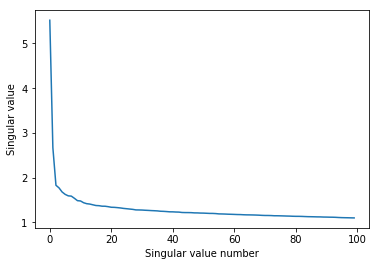

In [25]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

I dont think we need more than 20

In [26]:
words_compressed, _, docs_compressed = svds(my_mat, k=20)
docs_compressed = docs_compressed.transpose()

In [27]:
word_to_index = tfidf_vec2.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(5169, 20)


In [28]:
from sklearn.preprocessing import normalize
words_compressed = normalize(words_compressed, axis = 1)

In [29]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [30]:
word_to_index.keys()

dict_keys(['bursting', '1971', 'brothers', 'mountain', 'apartments', 'belongs', 'classical', 'sort', 'getting', 'excess', 'duets', 'small', '2003', 'airy', 'peak', 'examples', 'gags', 'tired', 'entering', 'subtly', 'overall', 'debates', 'turns', 'africa', 'sensuality', 'attracts', 'marguerite', 'aggressive', 'gathered', 'abstruse', '2009', 'connection', 'composition', 'teaching', 'carnival', 'acting', 'deciding', '21', 'series', 'skills', 'range', 'fades', 'separately', 'benefit', 'occur', 'bound', 'hardships', 'tyler', 'agrees', 'violations', 'laughed', 'existed', 'italian', 'hears', 'scenography', '1987', 'vividness', 'compensated', 'amusingly', 'surroundings', 'driving', 'castle', 'draws', 'imbue', 'man', 'improve', 'grossing', 'soprano', 'pleasure', 'harlem', 'flaherty', 'channel', 'human', '200', 'burning', 'skin', 'milk', 'boat', 'component', 'events', 'rousing', 'prosperity', 'perfectly', 'warm', 'jimmy', 'lift', 'visible', 'thing', 'gaining', 'striking', 'victims', 'guitar', 'b

In [31]:
closest_words("witty")

[('faces', 0.7301512200272888),
 ('charming', 0.6919905260693507),
 ('gentlemen', 0.6792358889751723),
 ('simplicity', 0.6542169586494396),
 ('ill', 0.6459522264568273),
 ('bored', 0.6406719428974098),
 ('ran', 0.6374284585606607),
 ('getting', 0.6349879121652379),
 ('nicholaw', 0.6179315991688639),
 ('gains', 0.6041199984754078)]

In [32]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [33]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
# subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(docs_compressed)
print(projected_docs.shape)

(473, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 473 samples in 0.008s...
[t-SNE] Computed neighbors for 473 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 473 / 473
[t-SNE] Mean sigma: 0.077129
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.420029
[t-SNE] KL divergence after 1000 iterations: 1.212412
(473, 2)


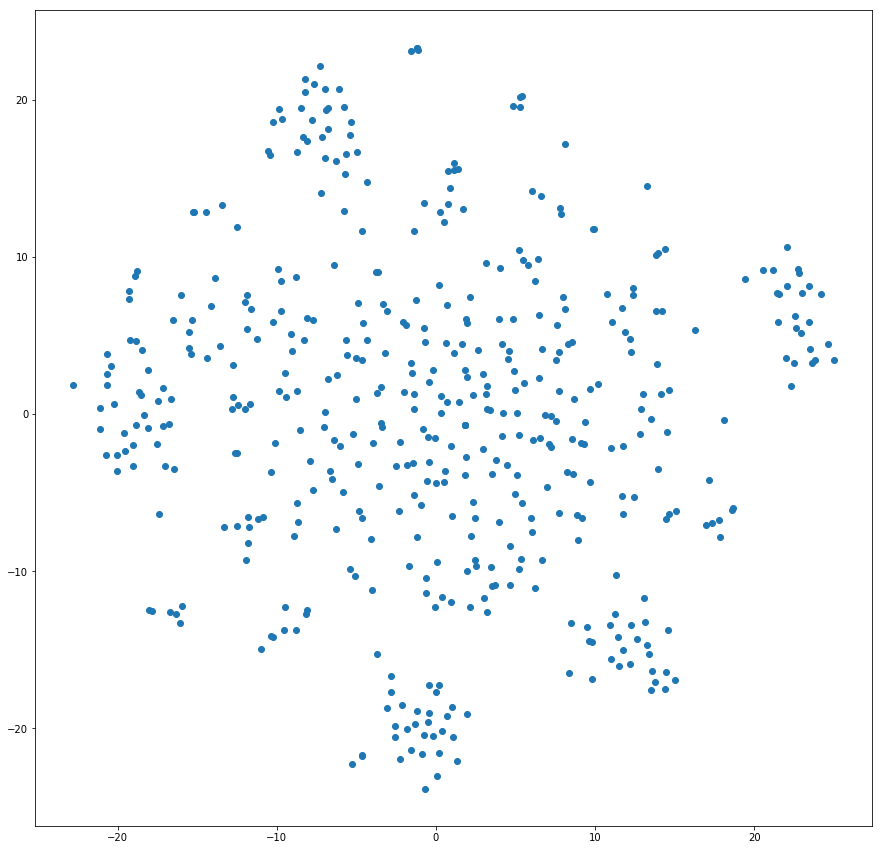

In [34]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

In [35]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_projects(project_index_in, k = 5):
    sims = docs_compressed.dot(docs_compressed[project_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(list(lyrics.keys())[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [36]:
for i in range(10):
    print(list(lyrics.keys())[i])
    for title, score in closest_projects(i):
        print("{}:{:.3f}".format(title[:40], score))
    print()

Bad Girls
Best Little Whorehouse in Texas, The:0.785
Brooklyn:0.725
Pirate Queen, The:0.674
Camelot:0.673
Chicago:0.661

Follies
Drowsy Chaperone, The:0.847
Damn Yankees:0.822
Crazy For You:0.818
Company:0.776
Fun Home:0.706

Spider-Man, Turn Off the Dark
Color Purple, The:0.839
Call Me Madam:0.787
Across the Universe:0.709
Fantasticks, The:0.665
Frankenstein: A New Musical:0.663

Grey Gardens
Greetings From Yorkville:0.729
Babes In Arms:0.662
Kinky Boots:0.557
Play On!:0.551
Annie:0.547

Little Women
Miss Liberty:0.795
Man of No Importance, A:0.792
Merrily We Roll Along:0.748
Little Me:0.732
Legally Blonde:0.729

Gypsy
Ernest in Love:0.660
My Name will always be Alice:0.612
Bajour:0.601
George M!:0.585
Gentlemen Prefer Blondes:0.572

Fame
Burn The Floor:0.745
Contact:0.720
Bajour:0.697
Fosse:0.642
Bring In 'Da Noise, Bring In 'Da Funk:0.634

You're a Good Man, Charlie Brown
Year with Frog and Toad, A:0.769
1776:0.717
Parade:0.714
25th Annual Putnam County Spelling Bee:0.710
Secret Gar

In [37]:
CP = np.zeros([len(lyrics),len(lyrics)])
for i in range(len(lyrics)):
    for title, score in closest_projects(i,len(lyrics)):
        index = musical_name_to_index[title]
        CP[index,i] = score
np.fill_diagonal(CP,1)

In [38]:
CP

array([[ 1.        , -0.05879626, -0.15631765, ..., -0.06716464,
         0.19476962,  0.22811375],
       [-0.05879626,  1.        , -0.31999291, ...,  0.70620062,
         0.01673368,  0.00186679],
       [-0.15631765, -0.31999291,  1.        , ..., -0.29504566,
         0.2869345 ,  0.55325293],
       ...,
       [-0.06716464,  0.70620062, -0.29504566, ...,  1.        ,
         0.12029942, -0.02410197],
       [ 0.19476962,  0.01673368,  0.2869345 , ...,  0.12029942,
         1.        ,  0.49096937],
       [ 0.22811375,  0.00186679,  0.55325293, ..., -0.02410197,
         0.49096937,  1.        ]])

In [39]:
CP[3,4]

0.23703995568737984

In [106]:
tfidf_vec3 = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 10, norm = "l2")
my_mat2 = tfidf_vec.fit_transform([d[i] for i in d]).transpose()

In [107]:
u, s, v_trans = svds(my_mat2, k=100)

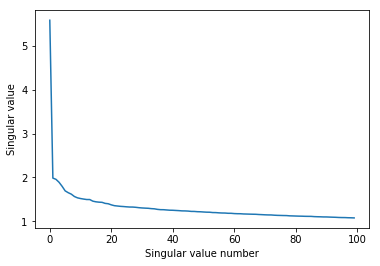

In [108]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [109]:
words_compressed, _, docs_compressed = svds(my_mat, k=20)
docs_compressed = docs_compressed.transpose()

In [110]:
word_to_index = tfidf_vec2.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(5169, 20)


In [111]:
from sklearn.preprocessing import normalize
words_compressed = normalize(words_compressed, axis = 1)

In [112]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [113]:
word_to_index.keys()

dict_keys(['breathe', 'period', 'europe', 'messages', 'war', 'load', 'withdraw', 'sought', 'follow', 'sad', 'catholic', 'note', 'civil', 'recalled', 'covered', 'daring', 'renewal', 'network', 'green', 'corpse', 'cut', 'prison', 'views', 'reacted', 'enormous', 'victims', 'instance', 'solo', 'mechanical', 'sees', 'belonged', '2015', 'masses', 'publications', 'stands', 'dancers', '1991', 'understand', 'agrees', 'schools', 'veterans', 'children', 'bennett', 'remove', 'writer', 'renewed', 'refugees', 'tv', 'captivating', 'won', 'lee', 'songwriter', 'operation', 'works', 'delight', 'quirky', 'eclipsed', 'movies', 'singles', 'marks', 'looked', 'dawn', 'actor', 'artificial', 'tables', 'interview', 'manifested', 'typical', 'unusual', 'rejected', 'drug', 'confused', 'food', 'theatergoers', 'artsy', 'muddy', 'leather', 'noting', 'doubts', 'angeles', 'dramas', 'themes', 'resonate', 'speak', 'filmed', 'format', 'biggest', 'soft', 'phenomenal', 'clumsy', 'importance', 'skinned', 'australian', 'profi

In [114]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [115]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
# subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(docs_compressed)
print(projected_docs.shape)

(473, 20)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 473 samples in 0.004s...
[t-SNE] Computed neighbors for 473 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 473 / 473
[t-SNE] Mean sigma: 0.077129
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.781868
[t-SNE] KL divergence after 1000 iterations: 1.155602
(473, 2)


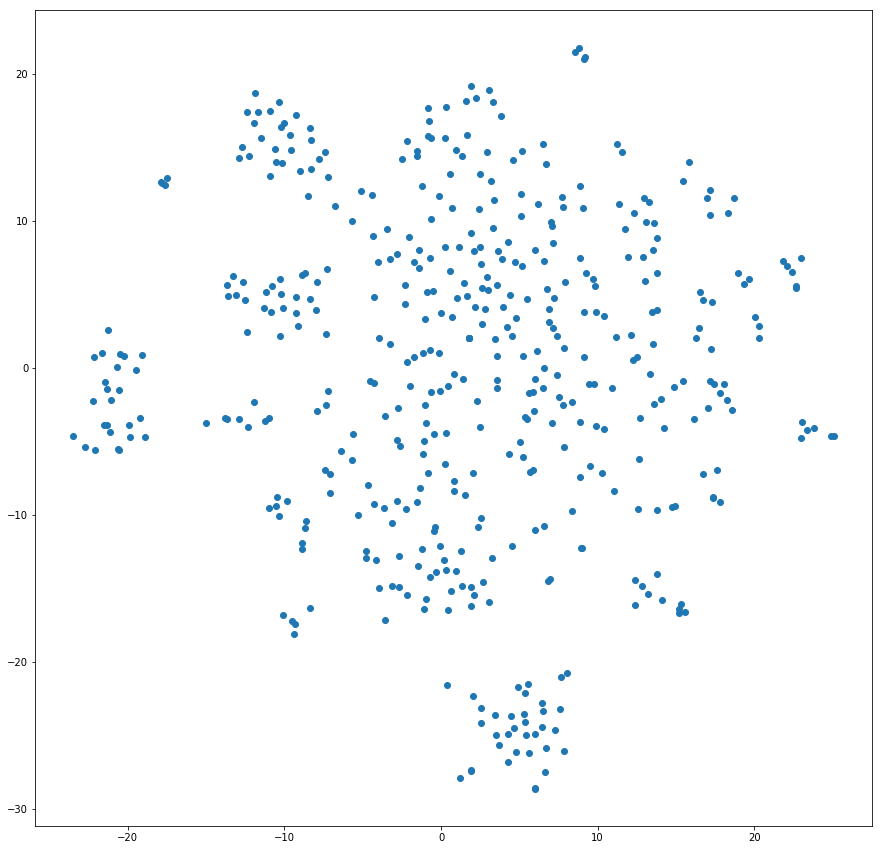

In [116]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

In [117]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_projects(project_index_in, k = 5):
    sims = docs_compressed.dot(docs_compressed[project_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(list(lyrics.keys())[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [118]:
for i in range(10):
    print(list(lyrics.keys())[i])
    for title, score in closest_projects(i):
        print("{}:{:.3f}".format(title[:40], score))
    print()

Class Act, A
Bajour:0.683
Big River:0.663
Bombay Dreams:0.660
Barnum:0.619
Baker's Wife, The:0.609

Jekyll & Hyde
Wicked:0.807
Kismet:0.771
Narnia:0.716
Sweeney Todd: The Demon Barber of Fleet :0.683
Cinderella: Songs from the Classic Fairy:0.662

Mary Poppins
Matilda:0.833
Priscilla: Queen of the Desert:0.730
Motown:0.710
Most Happy Fella, The:0.670
Raisin:0.625

Secret Garden, The
Passing Strange:0.704
You're a Good Man, Charlie Brown:0.698
Pacific Overtures:0.682
Once On This Island:0.682
We Will Rock You:0.677

Miss Liberty
Little Women:0.795
Mack & Mabel:0.762
Merrily We Roll Along:0.760
Rooms: A Rock Romance:0.751
Seesaw:0.730

Love Never Dies
Phantom of the Opera, The:0.787
Evita:0.764
LoveMusik:0.754
Andrew Lloyd Webber Divas:0.730
Tell Me On A Sunday:0.680

Very Potter Sequel, A
Very Potter, A:0.921
Marvelous Wonderettes, The:0.676
13:0.645
Seussical:0.641
Shrek:0.623

American in Paris, An
Chicago:0.723
Best Little Whorehouse in Texas, The:0.659
Pirate Queen, The:0.635
Catch 

In [119]:
CP2 = np.zeros([len(lyrics),len(lyrics)])
for i in range(len(lyrics)):
    for title, score in closest_projects(i,len(lyrics)):
        index = musical_name_to_index[title]
        CP2[index,i] = score
np.fill_diagonal(CP2,1)

In [120]:
CP2

array([[ 1.00000000e+00,  2.22057189e-01,  2.08706755e-01, ...,
         5.43031518e-01,  1.19309081e-01,  5.45238768e-02],
       [ 2.22057189e-01,  1.00000000e+00,  2.49800475e-01, ...,
        -2.31555707e-01,  2.94424149e-01, -8.98397716e-02],
       [ 2.08706755e-01,  2.49800475e-01,  1.00000000e+00, ...,
        -2.01339644e-01, -7.66012695e-04, -1.34647876e-01],
       ...,
       [ 5.43031518e-01, -2.31555707e-01, -2.01339644e-01, ...,
         1.00000000e+00, -7.04268021e-02,  2.26299338e-01],
       [ 1.19309081e-01,  2.94424149e-01, -7.66012695e-04, ...,
        -7.04268021e-02,  1.00000000e+00,  4.24454155e-01],
       [ 5.45238768e-02, -8.98397716e-02, -1.34647876e-01, ...,
         2.26299338e-01,  4.24454155e-01,  1.00000000e+00]])

In [41]:
import pandas
reviews = pandas.read_csv("reviews_v8.csv",sep=",",encoding = "latin1")
mydict = reviews.to_dict('index')

In [42]:
reviews

,Name,Reviews,Adjectives
0,In a Pickle,"['""Loopy, lovely and almost impossibly good-hu...",[]
1,Distorted Diznee,"['Amazing drag show at Laurie Beechman', ""4 of...","['Enchanting, Entertaining, Funny, Great singi..."
2,On the Exhale,"['""Marin Ireland is armed only with MartÌ_n Zi...","['Smart, Relevant, Profound, Great acting, Mus..."
3,Edgar Allan,"['""A perfect piece of dark comedy...By turns a...","['Clever, Great acting, Great singing, Charmin..."
4,"Kiss Me, Kate","['""ItÛªs smashing. The production has gained ...","['Great staging, Riveting, Refreshing, Absorbi..."
5,The Unusual Tale of Mary &amp; Jos...,"['""The songs never reach anything preachy, rat...","['Cliched, Entertaining, Indulgent, Relevant, ..."
6,The Boy Who Danced On Air,"['""A challenging, courageous, and beautiful ne...","['Clever, Enchanting, Delightful, Masterful, P..."
7,Inner Voices 2018,"[""ÛÏDifficult-to-sing but powerfully expressi...","['Heartfelt, Great acting, Absorbing, Intellig..."
8,Real Men: The Musical,"['""With \'The Real Men: The Musical,\' the tit...","['Clever, Funny, Great acting, Entertaining', ..."
9,Ordinary Days,['ÛÏA show that sneaks up on you and captures...,"['Clever, Delightful, Funny, Great acting', 'N..."


In [43]:
showscore = {}
for i in mydict:
    showscore[mydict[i]["Name"]] = {"Adjectives":mydict[i]["Adjectives"],"Reviews":mydict[i]["Reviews"]}

In [44]:
showscore.keys()

dict_keys(['Blueprint Specials', 'A New Brain', 'Hereafter Musical', 'Betty and the Belrays', 'Lady of The Castle', 'Peer Gynt &amp; the Norwegian Hapa...', 'Money Talks the Musical', 'Folk Wandering', 'Midtown International Theatre ...', 'Rap Guide to Climate Chaos', 'Plaid Tidings', 'A Christmas Carol in Harlem', 'A Little Night Music', 'Cabaret', 'The Day Before Spring', 'Missed Connections: A Craigsli...', 'Buskers the Musical', 'Brigadoon', 'Carmelina', 'Kinky Boots', 'Sweetee', 'Out Of My Comfort Zone', 'åÁFigaro!', 'Sweeney Todd: The Demon Barber...', "The Band's Visit", 'Between Gods and Kings', 'I Married an Angel', 'The Visit', 'Ars Nova ANT Fest 2015', 'Short Play &amp; Musical Festival ...', 'Mama Rose - A Solo Musical?', 'Honeymoon in Vegas', 'Mr. Chekhov &amp; Mr. Porter', '12 Steps: The Musical!', 'Real Men, A musical for guys a...', 'Rat Pack Undead', 'The Gruffalo', 'Cleopatra: The New Pop Experience', 'Hedwig and the Angry Inch', 'Headvoice', 'Godspell', 'The Phantom 

In [45]:
#bd is lyrics
#showscore is reviews
with open('proper_to_backend.json', 'r') as JSON:
    good_names = json.load(JSON)
new_showscore = dict(showscore)

In [46]:
for s in new_showscore:
    if "&" in s and s not in ["Song &amp; Dance", "Mack &amp; Mabel", "Jekyll &amp; Hyde"]:
        new_key = s[:s.index("&amp;")] + "and" + s[s.index("&amp;")+5:]
        showscore[new_key] = showscore.pop(s)

In [47]:
for key in showscore.keys():
    if "..." in key:
        #in_bd = False
        for bd_key in good_names.keys():
            if key[:key.index('...')].lower() in bd_key.lower():
                new_showscore[bd_key] = new_showscore.pop(key)
                #in_bd = True
                print(key)

Sweeney Todd: The Demon Barber...
Sunday in the Park with George...
A Funny Thing Happened on the ...
You're a Good Man, Charlie Bro...
Charlie and The Chocolate Fact...
On a Clear Day You Can See For...


In [48]:
overlap = []
not_in = []
for show_key in new_showscore.keys():
    if show_key.lower() in [g.lower() for g in good_names.keys()]:
        overlap.append(show_key)
    else:
        not_in.append(show_key)

In [49]:
for i in new_showscore:
    if "Ain't Too Proud" in i:
        print(i)

Ain't Too Proud ÛÒ The Life and...


In [50]:
name_corrections = {
    "A Bronx Tale":"Bronx Tale",
    "Beauty and the Beast":"Disney's Beauty And The Beast",
    "Billy Elliot: The Musical":"Billy Elliot",
    "Cinderella":"Cinderella: Songs from the Classic Fairy Tale",
    "Frankenstein the Musical":"Frankenstein: A New Musical",
    "Frozen the Musical":"Frozen",
    "Grand Hotel, The Musical":"Grand Hotel",
    "Groundhog Day The Musical":"Groundhog Day",
    "Hello, Dolly!":"Hello, Dolly",
    "Motown: The Musical":"Motown",
    "Oklahoma!":"Oklahoma",
    "Oliver!":"Oliver",
    "Pretty Woman: The Musical":"Pretty Woman",
    "School of Rock - The Musical":"School of Rock",
    "Snow White":"Snow White And The Seven Dwarfs",
    "The Lion King":"Lion King",
    "The Little Mermaid":"Little Mermaid",
    "The Prom":"Prom",
    "The Wild Party":"Wild Party",
    "Urinetown: The Musical":"Urinetown",
    "[title of show]":"Title Of Show",
    "Beautiful: The Carole King Mus...":"Beautiful: The Carole King",
    "Ain't Too Proud ÛÒ The Life and...":"Ain't Too Proud",
    "Christmas Spectacular Starring...":"Radio City Christmas Spectacular",
    "Tick, Tick ... Boom!":"Tick, Tick... Boom",
    "La Cage aux Folles":"La Cage Aux Folles",
    "Rock of Ages":"Rock Of Ages",
    "In The Heights":"In the Heights",
    "Do I Hear a Waltz?":"Do I Hear A Waltz?",
    "Bells are Ringing":"Bells Are Ringing",
    "Once Upon a Mattress":"Once Upon A Mattress",
    "Subways are for Sleeping":"Subways Are for Sleeping",
    "The Wizard of Oz":"The Wizard Of Oz",
    "Milk and Honey":"Milk And Honey",
    "Hedwig and the Angry Inch":"Hedwig And The Angry Inch",
    "Fiddler On The Roof":"Fiddler on the Roof",
    "Songs for a New World":"Songs For A New World",
    "Into The Woods":"Into the Woods",
    "The Boys from Syracuse":"The Boys From Syracuse"
}

In [51]:
for i in name_corrections:
    if i not in new_showscore:
        print(i)

In [52]:
for old_name in name_corrections.keys():
    new_showscore[name_corrections[old_name]] = new_showscore.pop(old_name)

In [53]:
new_showscore.keys()

dict_keys(['Blueprint Specials', 'A New Brain', 'Hereafter Musical', 'Betty and the Belrays', 'Lady of The Castle', 'Peer Gynt &amp; the Norwegian Hapa...', 'Mama Rose - A Solo Musical?', 'Folk Wandering', 'La Cage Aux Folles', 'Cinderella: Songs from the Classic Fairy Tale', 'Midtown International Theatre ...', 'The Trials of Alice in Wonderland', 'Plaid Tidings', 'The Golden Apple', 'A Little Night Music', 'Cabaret', 'The Day Before Spring', 'Missed Connections: A Craigsli...', 'Buskers the Musical', 'Brigadoon', 'Carmelina', 'Kinky Boots', 'Sweetee', 'Out Of My Comfort Zone', 'åÁFigaro!', 'Sunday in the Park With George', "The Band's Visit", 'Between Gods and Kings', 'Kid Victory', '1001 Nights: A Love Story abou...', 'The Visit', 'Charlie and the Chocolate Factory', 'Short Play &amp; Musical Festival ...', 'Honeymoon in Vegas', 'Mr. Chekhov &amp; Mr. Porter', 'Bronx Tale', '12 Steps: The Musical!', 'Real Men, A musical for guys a...', 'Rat Pack Undead', 'The Gruffalo', 'Once Upon A

In [54]:
for rev in new_showscore.values():
    print(rev["Reviews"])
    break

['"The artists behind the original works were uniquely giftedÛ_The wispy, of-its-time plot is crazy but delightfulÛ_It is absolutely, gloriously priceless and irreplaceable. The songs are electrifyingÛ_And there\'s no fault to be found with the castÛ_For writing that was considered all but disposable and inconsequential in its time, it reminds us more than any show in recent memory just how stirring, important, and even transformative musical theatre can be at its most honest and most uplifting best." ', '"Although the broad, unsophisticated humor hasnÛªt aged particularly well, the show is nonetheless great fun, both for its time-capsule qualities and the catchy score...Unsurprisingly, veteran performers Osnes and Swenson are terrific...Watching the show aboard the massive aircraft carrier that was decommissioned in 1974 after serving from World War II through the Vietnam War is an uplifting and novel experience." ', "ÛÏWhile the topical material (mainly by Auerbach) and the 20 

In [55]:
rev_list = []
for rev in new_showscore.values():
    rev_list.append(rev["Reviews"])

In [56]:
tfidf_vec4 = TfidfVectorizer(max_features = 6000, stop_words = "english", max_df = 0.85, min_df = 3, norm = "l2")
doc_by_vocab4 = tfidf_vec4.fit_transform([i for i in rev_list]).transpose()
index_to_vocab4 = {i:v for i, v in enumerate(tfidf_vec4.get_feature_names())}

In [57]:
u4, s4, v_t4 = svds(doc_by_vocab4, k=100)

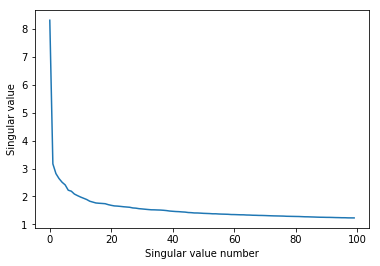

In [58]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s4[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [59]:
words_comp4, _, docs_comp4 = svds(doc_by_vocab4, k = 40)
docs_comp4 = docs_comp4.transpose()

In [60]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose = 1)

In [61]:
subset = docs_comp4[:4500,:]
proj_docs = tsne.fit_transform(subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 828 samples in 0.006s...
[t-SNE] Computed neighbors for 828 samples in 0.313s...
[t-SNE] Computed conditional probabilities for sample 828 / 828
[t-SNE] Mean sigma: 0.064769
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.153336
[t-SNE] KL divergence after 1000 iterations: 1.549536


In [62]:
from sklearn.preprocessing import normalize

docs_comp4 = normalize(docs_comp4, axis = 1)
def closest_docs(doc_index_in, k = 5):
    sims = docs_comp4.dot(docs_comp4[doc_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(list(new_showscore.keys())[i], sims[i]/sims[asort[0]]) for i in asort[1:]]

In [65]:
closest_docs(685, k = len(new_showscore))

[('Aladdin', 0.8967819215080084),
 ('Beetlejuice', 0.6596733892665247),
 ('Mean Girls', 0.651908426888917),
 ('Beetlejuice ', 0.6485935494656874),
 ('Groundhog Day', 0.6470692009557972),
 ('Pretty Woman', 0.638790121899534),
 ('Anastasia', 0.6270458334749718),
 ('Moulin Rouge', 0.6162291691254504),
 ('The Cher Show', 0.6064879828474893),
 ('Dr. Zhivago', 0.6046546481540553),
 ('Amelie', 0.6024344021677411),
 ('Disenchanted', 0.598539166970633),
 ('Lion King', 0.5939853104816902),
 ('Gigi', 0.5694615811327304),
 ('Clueless, The Musical', 0.56211314236337),
 ('American Psycho', 0.5521232675867672),
 ('Wicked Frozen', 0.5415718218975132),
 ('Showgirls! The Musical!', 0.5348039580552448),
 ('Benny &amp; Joon', 0.5233575178723806),
 ('Bronx Tale', 0.5154985989252523),
 ('Les Miserables', 0.4828580198246778),
 ('Honeymoon in Vegas', 0.48157550230039514),
 ('At the Crossroads: Music for F...', 0.47691702939086533),
 ('Cruel Intentions', 0.46990783662899316),
 ('Finding Neverland', 0.463026107

In [64]:
list(new_showscore.keys()).index("Frozen")

685

In [66]:
rev_sim = {}
for mus in new_showscore:
    i = list(new_showscore.keys()).index(mus)
    rev_sim[mus] = closest_docs(i, k = len(new_showscore))

In [79]:
rev_sim["The Wizard Of Oz"]

[('The Wiz', 0.6672986271425025),
 ('Owen &amp; Mzee the Musical', 0.6446533413305587),
 ('Treasure Island', 0.6043273635583415),
 ('Old Turtle and the Broken Truth', 0.5896975083417986),
 ('The Snowy Day and Other Stories', 0.55578929021323),
 ('Devil And The Deep', 0.49643590191779857),
 ("My Name Is Gideon: I'm Probabl...", 0.49633530555661776),
 ('Edna the Stomper', 0.48895440812457464),
 ('Little Mermaid', 0.46763398819646224),
 ("Madeline's Christmas", 0.4601953997239555),
 ('Fairy Tale Christmas: The Musi...', 0.451016321116359),
 ('James and the Giant Peach', 0.4367442997428559),
 ('KulturfestNYC', 0.43448841965468316),
 ('Yaki Yim Bamboo: The Musical', 0.4337490868692558),
 ('Dorian Gray', 0.43074767700318345),
 ('My Perfect Pet', 0.42870959458189417),
 ('Flight School The Musical', 0.427218603401772),
 ("Disney's Beauty And The Beast", 0.4124544546098497),
 ('Stone Soup: The Musical', 0.4088245472262327),
 ('Addy &amp; Uno', 0.39901275797722124),
 ('Princess Particular', 0.39

In [73]:
revsims_M = np.zeros([len(lyrics),len(lyrics)])
for mus in rev_sim:
    if mus in good_names:
        mus_backend = good_names[mus]
        if mus_backend in musical_name_to_index:
            i = musical_name_to_index[mus_backend]
            for name,score in rev_sim[mus]:
                if name in good_names:
                    name_backend = good_names[name]
                    if name_backend in musical_name_to_index.keys():
                        j = musical_name_to_index[name_backend]
                        revsims_M[i,j] = score
np.fill_diagonal(revsims_M,1)
        

In [77]:
revsims_M[249]

array([ 0.00000000e+00, -4.54088367e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.29327159e-02,  0.00000000e+00, -2.38263756e-01,
        0.00000000e+00,  0.00000000e+00,  4.67633988e-01,  2.69074551e-01,
        2.66923602e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.66391314e-02,  0.00000000e+00,  1.83952092e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.58869556e-01,  0.00000000e+00,
        0.00000000e+00, -9.51099369e-02, -1.21143385e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.34403806e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.23800157e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.73533372e-02,  0.00000000e+00,
        3.61927911e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [80]:
new_showscore.keys()

dict_keys(['Blueprint Specials', 'A New Brain', 'Hereafter Musical', 'Betty and the Belrays', 'Lady of The Castle', 'Peer Gynt &amp; the Norwegian Hapa...', 'Mama Rose - A Solo Musical?', 'Folk Wandering', 'La Cage Aux Folles', 'Cinderella: Songs from the Classic Fairy Tale', 'Midtown International Theatre ...', 'The Trials of Alice in Wonderland', 'Plaid Tidings', 'The Golden Apple', 'A Little Night Music', 'Cabaret', 'The Day Before Spring', 'Missed Connections: A Craigsli...', 'Buskers the Musical', 'Brigadoon', 'Carmelina', 'Kinky Boots', 'Sweetee', 'Out Of My Comfort Zone', 'åÁFigaro!', 'Sunday in the Park With George', "The Band's Visit", 'Between Gods and Kings', 'Kid Victory', '1001 Nights: A Love Story abou...', 'The Visit', 'Charlie and the Chocolate Factory', 'Short Play &amp; Musical Festival ...', 'Honeymoon in Vegas', 'Mr. Chekhov &amp; Mr. Porter', 'Bronx Tale', '12 Steps: The Musical!', 'Real Men, A musical for guys a...', 'Rat Pack Undead', 'The Gruffalo', 'Once Upon A

In [81]:
musical_name_to_index["Wizard Of Oz, The"]

249

In [82]:
cosmat[np.isnan(cosmat)] = 0

In [83]:
np.savetxt("sim_matrix.csv",cosmat,delimiter=",") #saving the similarity matrix

In [84]:
json1 = json.dumps(musical_name_to_index) #saving name to index dictionary
f = open("name_to_index.json","w")
f.write(json1)
f.close()
json2 = json.dumps(musical_index_to_name) #saving index to name dictionary
f = open("index_to_name.json","w")
f.write(json2)
f.close()

In [ ]:
np.savetxt("composer_sim.csv",compM,delimiter=",") #saving the composer similarity

In [212]:
np.savetxt("SVM_sim.csv",CP,delimiter=",") #saving the similarity from the SVM stuff

In [213]:
# json3 = json.dumps(rev_sim)
# f = open("review_sim.json","w")
# f.write(json3)
# f.close()


In [215]:
np.savetxt("review_sim.csv",revsims_M,delimiter=",") #saving the reviews similaritys